In [2]:
import torch
import glob
from datasets import load_dataset, concatenate_datasets
from transformers import AutoModel
import torchvision.datasets as datasets
from numpy.linalg import norm

device = torch.device("cuda")

resolution = 28
latent_dim = 128



In [3]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.generate = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2),

            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),

            nn.Linear(512, resolution ** 2),
            nn.Tanh()
        )

    def forward(self, x):
        self.out = self.generate(x)
        return self.out
    

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.classify = nn.Sequential(
            nn.Flatten(),
            nn.Linear(resolution * resolution, 512), # (28*28, 512)
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )


    def forward(self, x):
        self.out = self.classify(x)
        return self.out

In [4]:
gen = Generator().to(device)
dis = Discriminator().to(device)

loss_fn = nn.BCELoss()

lr = 0.0005
batch_size = 500

optimizerGenerator = torch.optim.Adam(gen.parameters(), lr = lr)
optimizerDiscriminator = torch.optim.Adam(dis.parameters(), lr = lr)

fixedNoise = torch.randn((batch_size, latent_dim)).to(device)


In [5]:
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

transform = transforms.Compose(
        [
            transforms.Grayscale(),
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ]
)

def preprocess_train(examples):
      images = [image.convert("RGB") for image in examples['image']]
      examples["pixel_values"] = [transform(image) for image in images]

      return examples

def collate_fn(examples):
      pixel_values = torch.stack([example["pixel_values"] for example in examples])
      pixel_values = pixel_values.to(memory_format=torch.contiguous_format).float()

      return {"pixel_values": pixel_values}


dataset = load_dataset("ylecun/mnist", split="train").select(range(30000)) 

dataset = dataset.with_transform(preprocess_train)

print(dataset)


loader = DataLoader(dataset,
                    batch_size=batch_size,
                    collate_fn=collate_fn,
                    drop_last=True)

Dataset({
    features: ['image', 'label'],
    num_rows: 30000
})


{'pixel_values': tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        ...,


        [[[-1., -1., -1.,  ..., -1., -1., -1.],

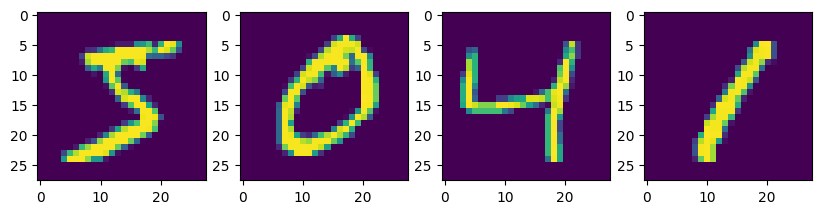

In [6]:
import matplotlib.pyplot as plt

print(next(iter(loader)))

pixel_values_array = next(iter(loader))["pixel_values"]

print(pixel_values_array.shape)

ax = plt.figure(figsize=(10, 10)).subplots(1, 4)

for i in range(4):
    img = (pixel_values_array[i].permute(1, 2, 0).cpu().detach().numpy())
    ax[i].imshow(img)

plt.show()


torch.Size([1, 784])


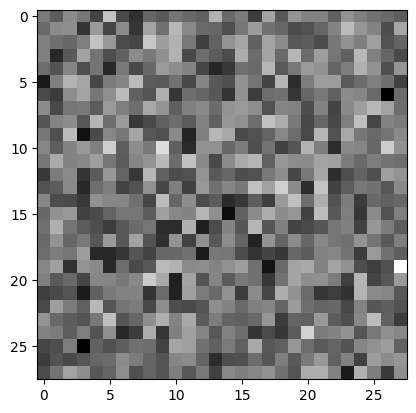

Epoch: 0
Loss train discriminator: 25.403084529563785
Loss train generator: 102.02709099650383
torch.Size([1, 784])


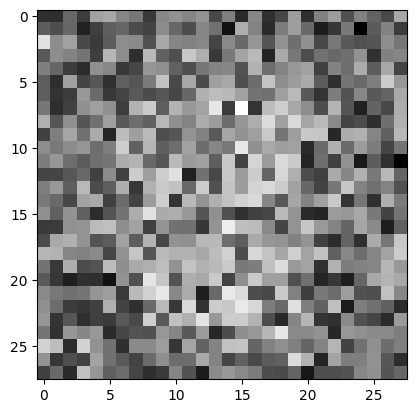

Epoch: 1
Loss train discriminator: 10.225316530559212
Loss train generator: 270.55974847078323
torch.Size([1, 784])


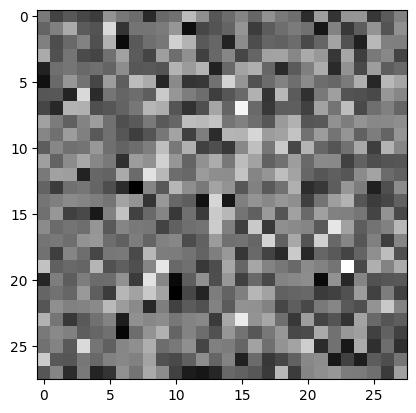

Epoch: 2
Loss train discriminator: 0.41135072230827063
Loss train generator: 356.98512172698975
torch.Size([1, 784])


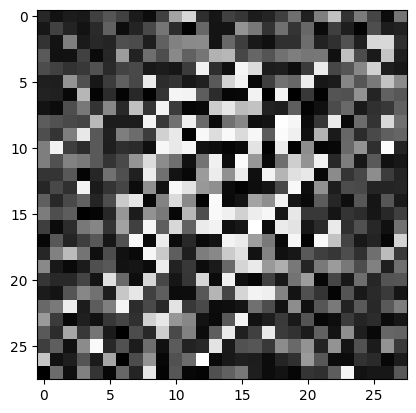

Epoch: 3
Loss train discriminator: 0.5213065996067598
Loss train generator: 350.12053537368774
torch.Size([1, 784])


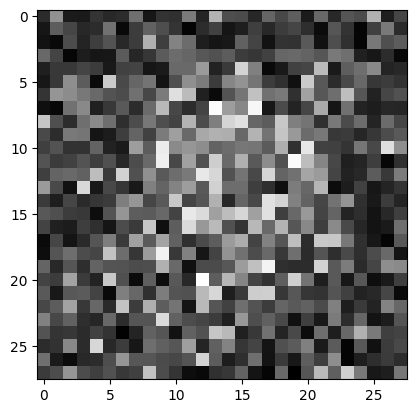

Epoch: 4
Loss train discriminator: 0.5679156024416443
Loss train generator: 465.07114601135254
torch.Size([1, 784])


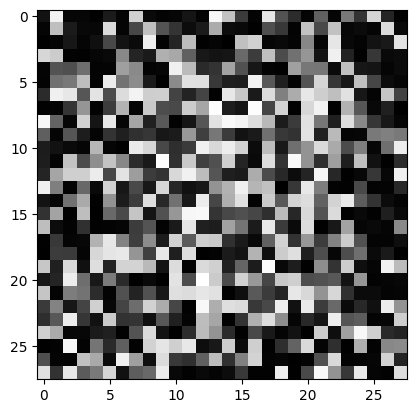

Epoch: 5
Loss train discriminator: 0.01007771447621053
Loss train generator: 563.2699604034424
torch.Size([1, 784])


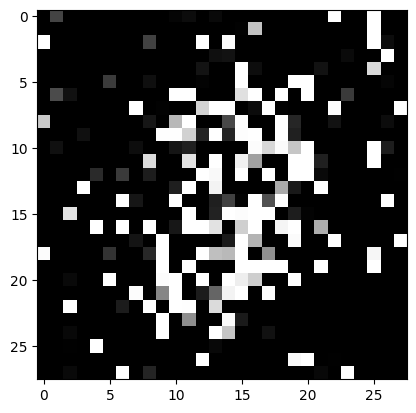

Epoch: 6
Loss train discriminator: 0.01122806966304779
Loss train generator: 528.5979852676392
torch.Size([1, 784])


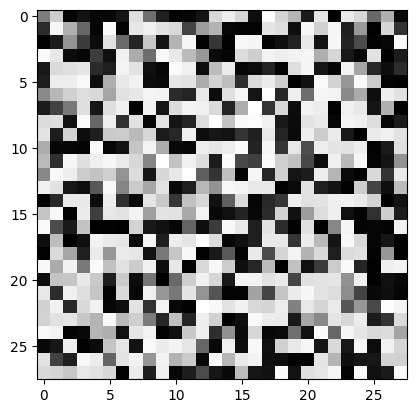

Epoch: 7
Loss train discriminator: 0.01389323835610412
Loss train generator: 519.9422378540039
torch.Size([1, 784])


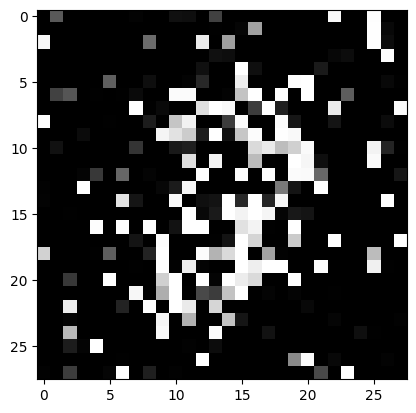

Epoch: 8
Loss train discriminator: 0.22388360602781177
Loss train generator: 435.2201852798462
torch.Size([1, 784])


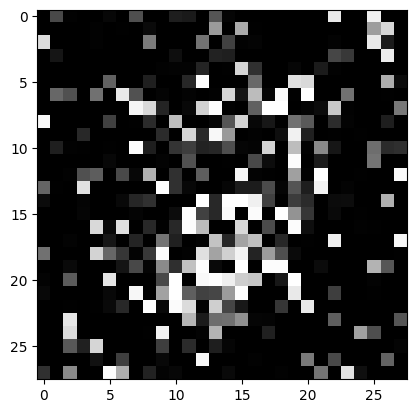

Epoch: 9
Loss train discriminator: 0.16055683579179458
Loss train generator: 465.47832584381104
torch.Size([1, 784])


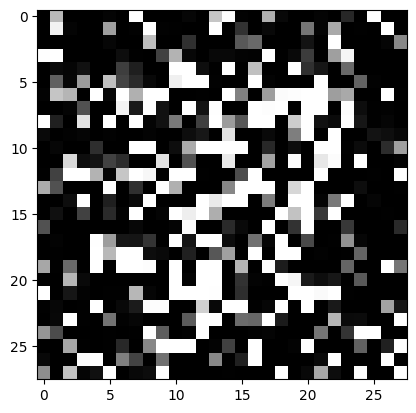

Epoch: 10
Loss train discriminator: 0.00801125760335708
Loss train generator: 545.5354862213135
torch.Size([1, 784])


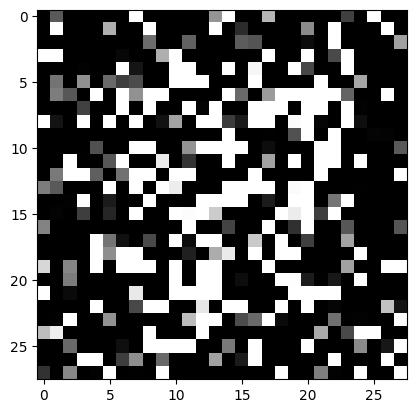

Epoch: 11
Loss train discriminator: 0.004267585285560926
Loss train generator: 595.8701658248901
torch.Size([1, 784])


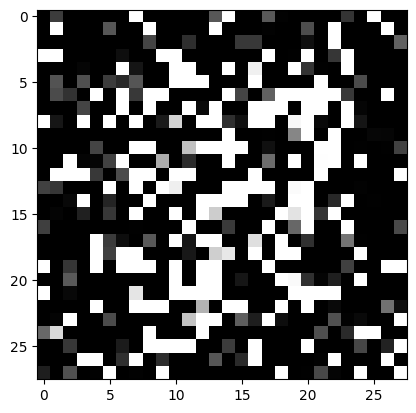

Epoch: 12
Loss train discriminator: 0.0027692929397744592
Loss train generator: 632.2203359603882
torch.Size([1, 784])


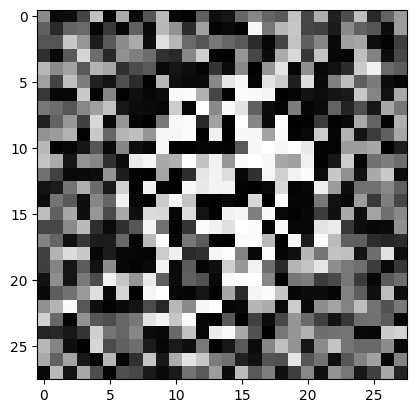

Epoch: 13
Loss train discriminator: 0.00207197723830177
Loss train generator: 651.5942049026489
torch.Size([1, 784])


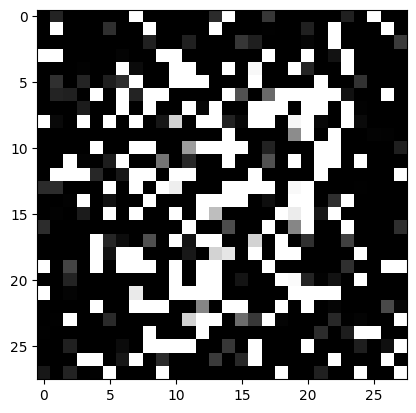

Epoch: 14
Loss train discriminator: 0.0016741348117648158
Loss train generator: 665.6729717254639
torch.Size([1, 784])


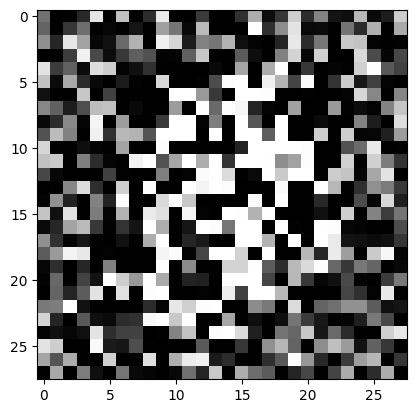

Epoch: 15
Loss train discriminator: 0.001512923507107189
Loss train generator: 663.2946147918701
torch.Size([1, 784])


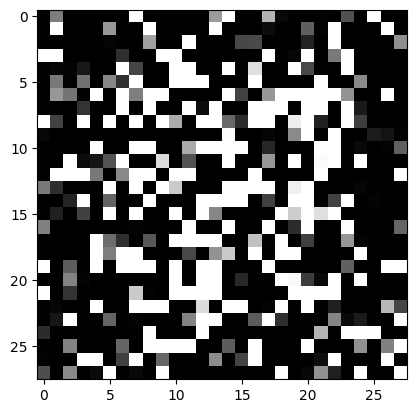

Epoch: 16
Loss train discriminator: 0.0014080588462093147
Loss train generator: 662.0441312789917
torch.Size([1, 784])


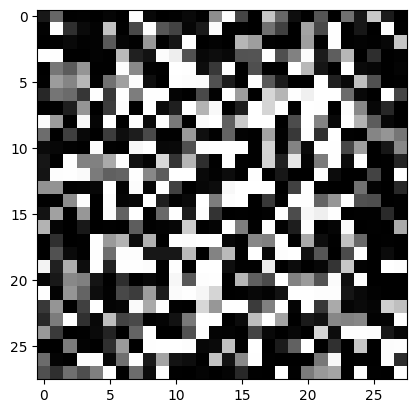

Epoch: 17
Loss train discriminator: 0.0011565151726244949
Loss train generator: 684.5704479217529
torch.Size([1, 784])


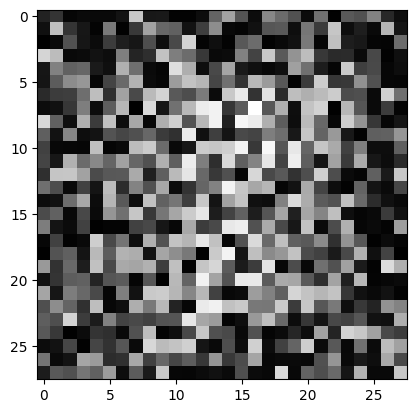

Epoch: 18
Loss train discriminator: 0.0010534587872825796
Loss train generator: 687.2238912582397
torch.Size([1, 784])


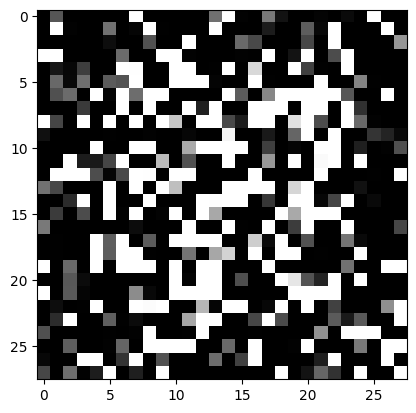

Epoch: 19
Loss train discriminator: 0.0009176834828394931
Loss train generator: 700.3821516036987
torch.Size([1, 784])


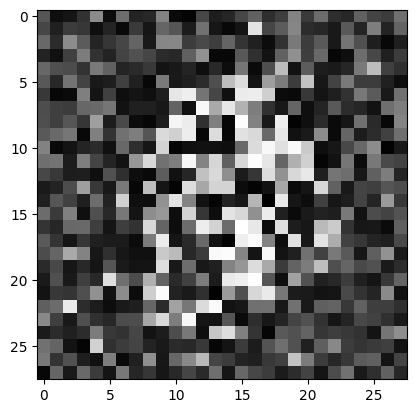

Epoch: 20
Loss train discriminator: 0.0008135833513733814
Loss train generator: 710.4289741516113
torch.Size([1, 784])


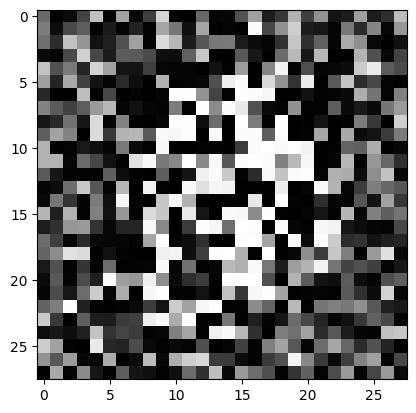

Epoch: 21
Loss train discriminator: 0.0007872296964706038
Loss train generator: 704.08043384552
torch.Size([1, 784])


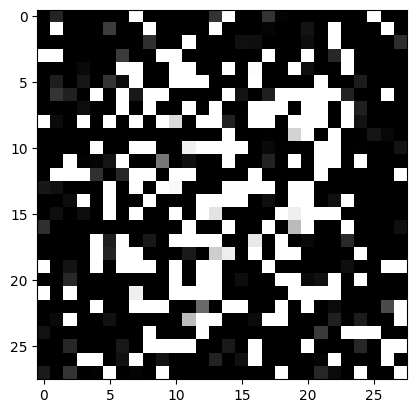

Epoch: 22
Loss train discriminator: 0.0007137640395740164
Loss train generator: 712.2000913619995
torch.Size([1, 784])


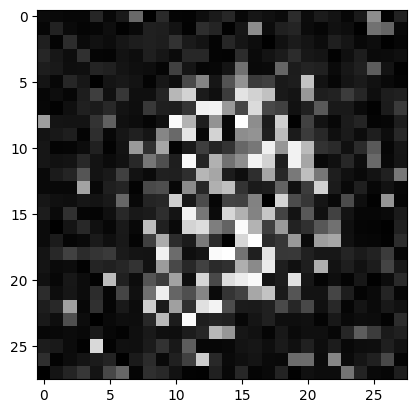

Epoch: 23
Loss train discriminator: 0.0006414204599423101
Loss train generator: 722.804895401001
torch.Size([1, 784])


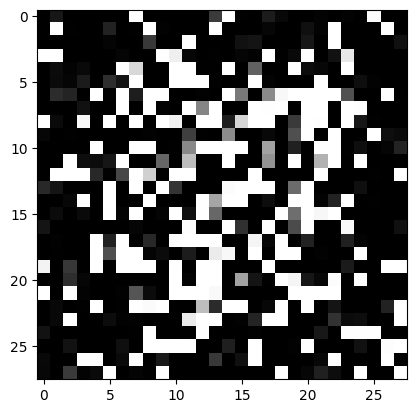

Epoch: 24
Loss train discriminator: 0.0005988510893075727
Loss train generator: 725.5257930755615
torch.Size([1, 784])


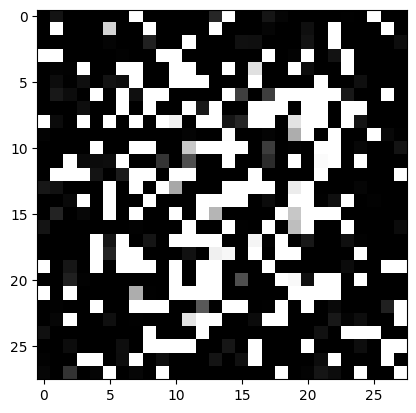

Epoch: 25
Loss train discriminator: 0.0005587720620496839
Loss train generator: 729.1453332901001
torch.Size([1, 784])


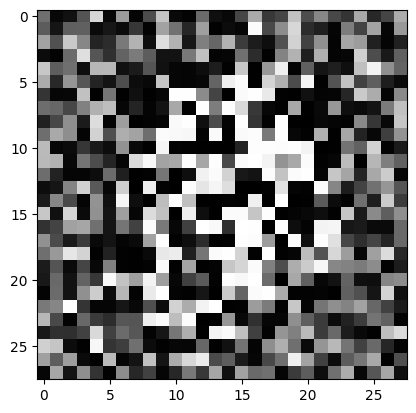

Epoch: 26
Loss train discriminator: 0.0005036084535277041
Loss train generator: 740.4410991668701
torch.Size([1, 784])


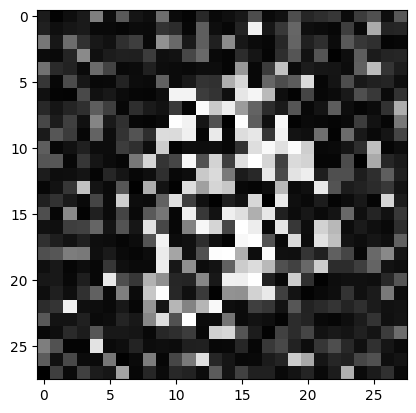

Epoch: 27
Loss train discriminator: 0.0004927794216200709
Loss train generator: 736.0395908355713
torch.Size([1, 784])


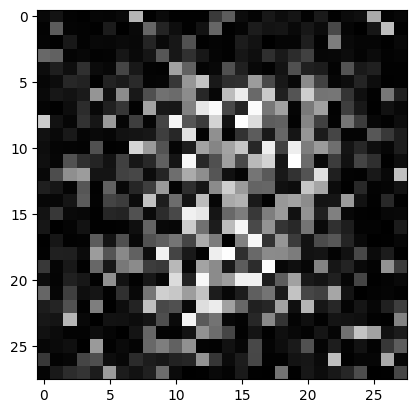

Epoch: 28
Loss train discriminator: 0.0004797111182597291
Loss train generator: 731.758768081665
torch.Size([1, 784])


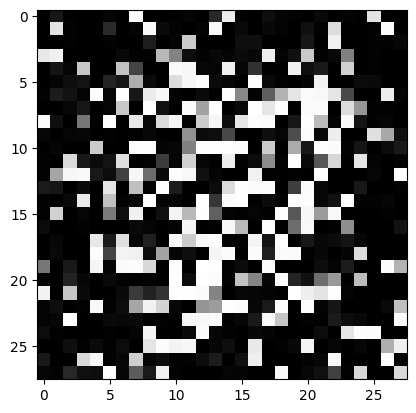

Epoch: 29
Loss train discriminator: 0.0004457001818991557
Loss train generator: 739.2285690307617
torch.Size([1, 784])


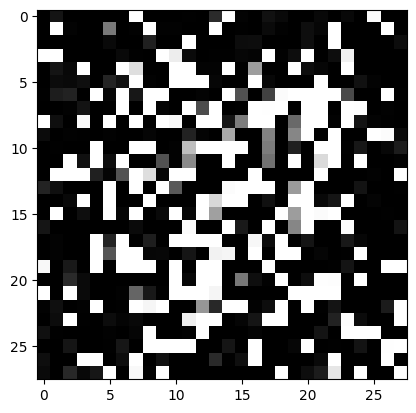

Epoch: 30
Loss train discriminator: 0.0005133863351147738
Loss train generator: 710.9132614135742
torch.Size([1, 784])


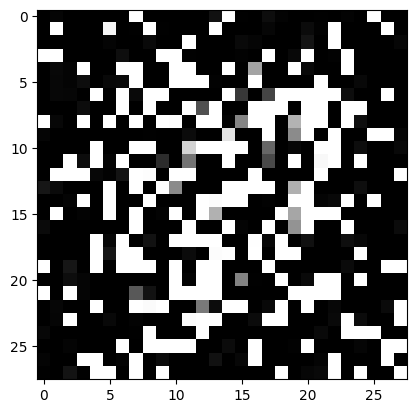

Epoch: 31
Loss train discriminator: 0.00043675802680809284
Loss train generator: 732.2832183837891
torch.Size([1, 784])


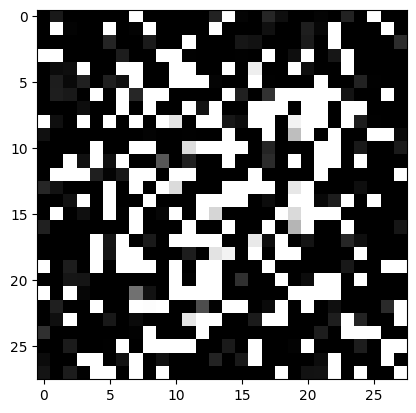

Epoch: 32
Loss train discriminator: 0.0003865766143462679
Loss train generator: 748.2174100875854
torch.Size([1, 784])


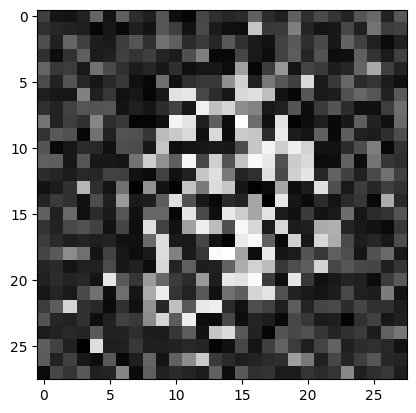

Epoch: 33
Loss train discriminator: 0.0003495979231047386
Loss train generator: 760.4392538070679
torch.Size([1, 784])


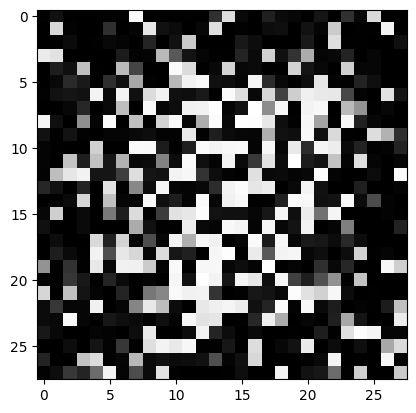

Epoch: 34
Loss train discriminator: 0.00033786991889428464
Loss train generator: 759.0220642089844
torch.Size([1, 784])


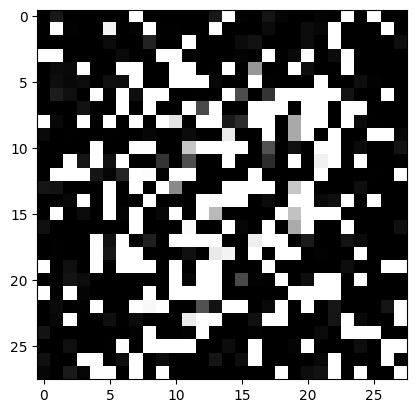

Epoch: 35
Loss train discriminator: 0.0003201053054908698
Loss train generator: 761.5223970413208
torch.Size([1, 784])


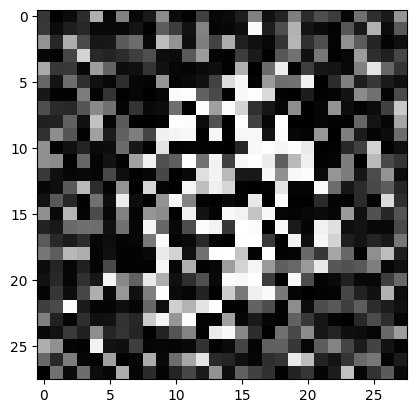

Epoch: 36
Loss train discriminator: 0.0002920277902376256
Loss train generator: 772.6575746536255
torch.Size([1, 784])


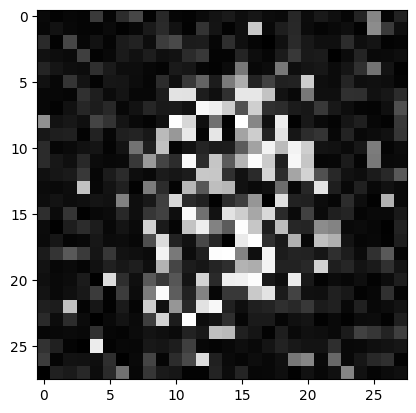

Epoch: 37
Loss train discriminator: 0.0002690957608137978
Loss train generator: 781.7647857666016
torch.Size([1, 784])


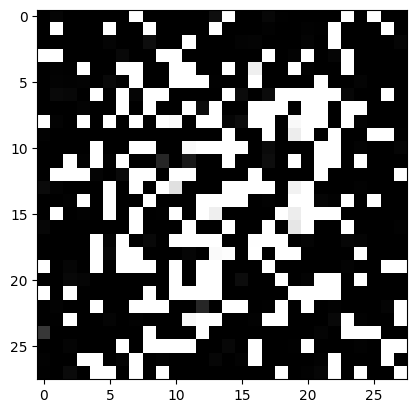

Epoch: 38
Loss train discriminator: 0.0002611281202007376
Loss train generator: 779.25172996521
torch.Size([1, 784])


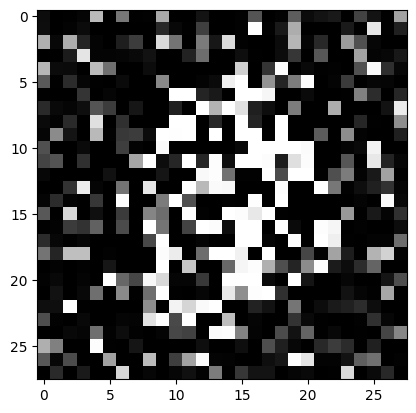

Epoch: 39
Loss train discriminator: 0.0002504274825696484
Loss train generator: 779.7332735061646
torch.Size([1, 784])


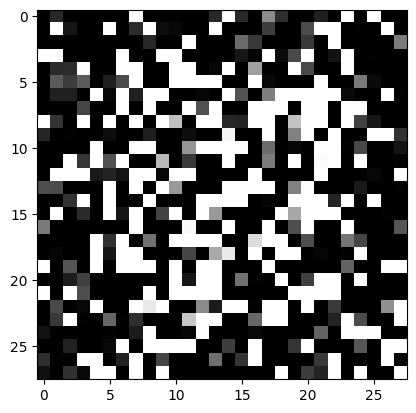

Epoch: 40
Loss train discriminator: 0.0006900027883602888
Loss train generator: 723.8578777313232
torch.Size([1, 784])


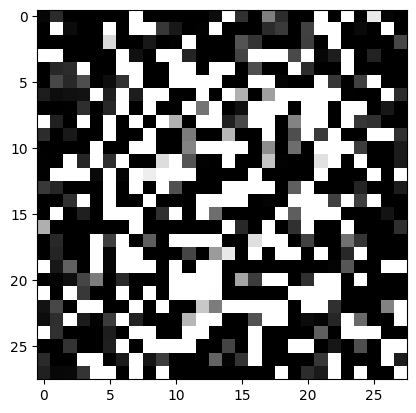

Epoch: 41
Loss train discriminator: 0.0012034593491989654
Loss train generator: 636.6740818023682
torch.Size([1, 784])


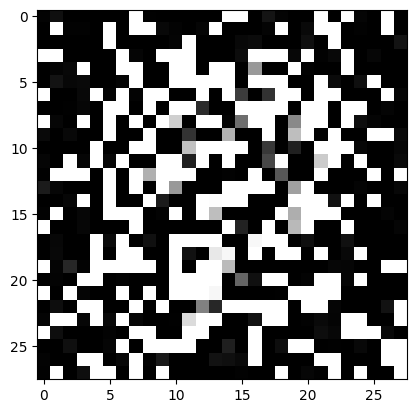

Epoch: 42
Loss train discriminator: 0.0017138210787379649
Loss train generator: 609.5138158798218
torch.Size([1, 784])


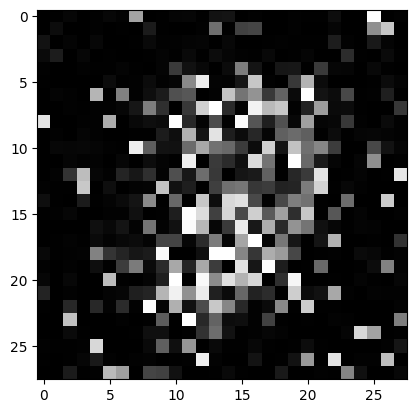

Epoch: 43
Loss train discriminator: 0.0007708601697231643
Loss train generator: 670.2141056060791
torch.Size([1, 784])


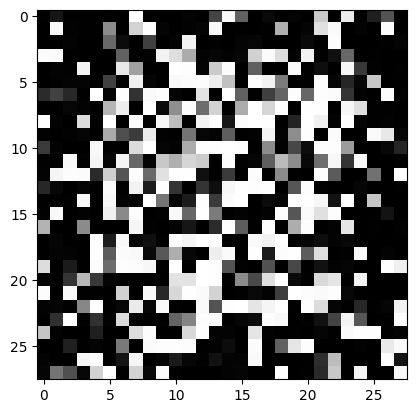

Epoch: 44
Loss train discriminator: 0.0006219116794454749
Loss train generator: 687.9333982467651
torch.Size([1, 784])


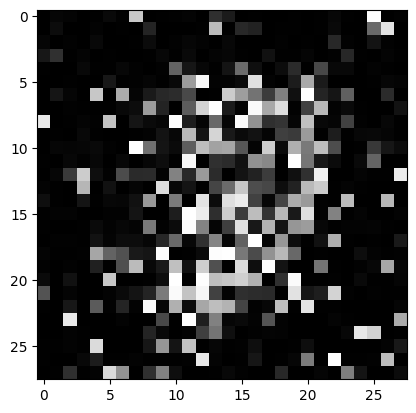

Epoch: 45
Loss train discriminator: 0.0004598387945407012
Loss train generator: 717.965723991394
torch.Size([1, 784])


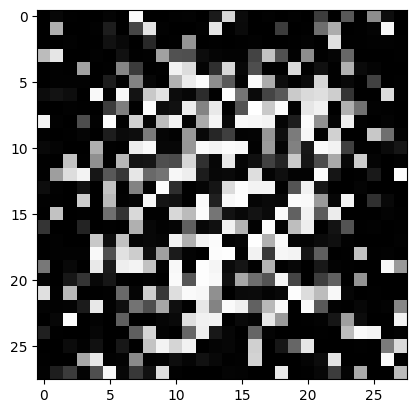

Epoch: 46
Loss train discriminator: 0.00035058898583884
Loss train generator: 746.8215522766113
torch.Size([1, 784])


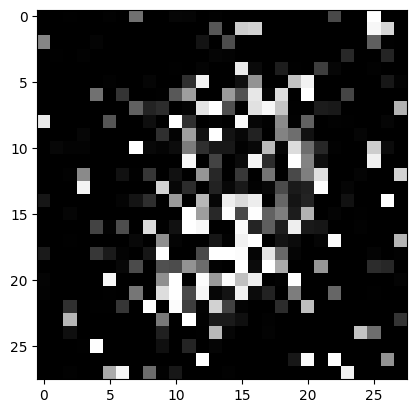

Epoch: 47
Loss train discriminator: 0.000290009488708165
Loss train generator: 765.7524337768555
torch.Size([1, 784])


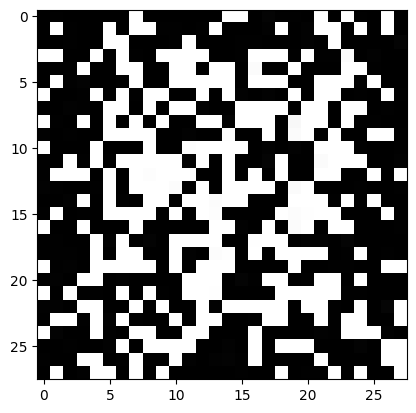

Epoch: 48
Loss train discriminator: 0.0002490615963779419
Loss train generator: 780.037633895874
torch.Size([1, 784])


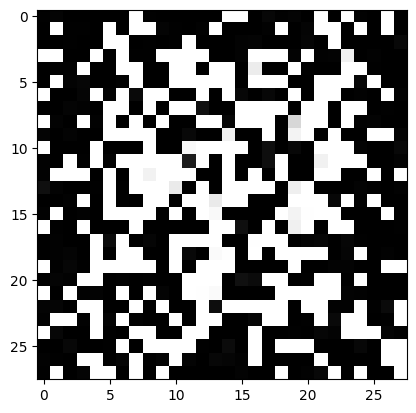

Epoch: 49
Loss train discriminator: 0.00021876018558941723
Loss train generator: 791.649847984314
torch.Size([1, 784])


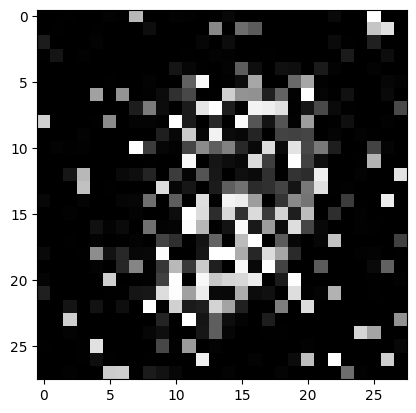

Epoch: 50
Loss train discriminator: 0.0001951247638771747
Loss train generator: 801.5387201309204
torch.Size([1, 784])


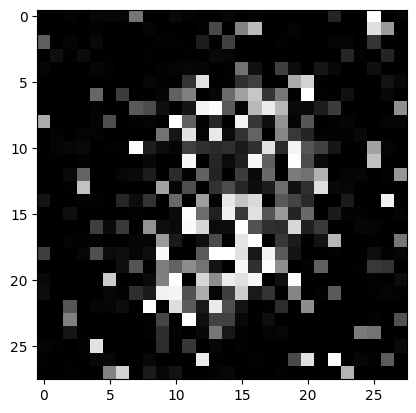

Epoch: 51
Loss train discriminator: 0.00017606124788471789
Loss train generator: 810.1435194015503
torch.Size([1, 784])


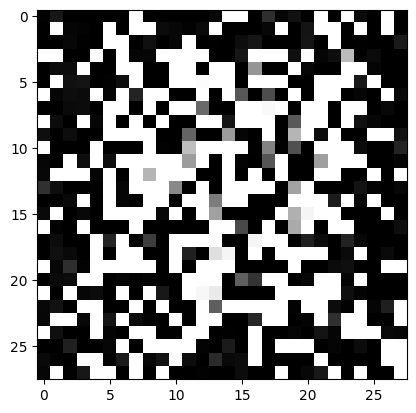

Epoch: 52
Loss train discriminator: 0.00016027925971684454
Loss train generator: 817.789891242981
torch.Size([1, 784])


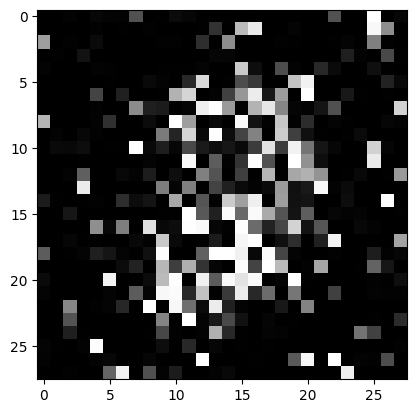

Epoch: 53
Loss train discriminator: 0.00014697191386403574
Loss train generator: 824.7142658233643
torch.Size([1, 784])


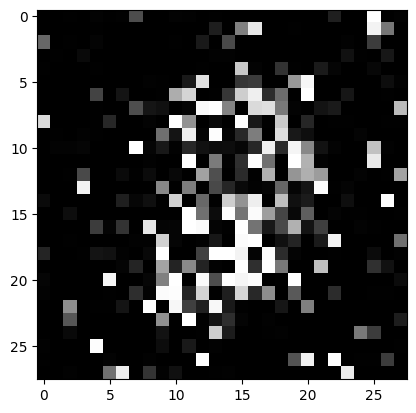

Epoch: 54
Loss train discriminator: 0.00013552966925090004
Loss train generator: 831.0813655853271
torch.Size([1, 784])


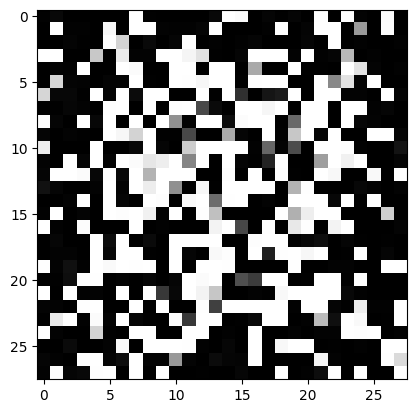

Epoch: 55
Loss train discriminator: 0.00012561302389713092
Loss train generator: 836.9468250274658
torch.Size([1, 784])


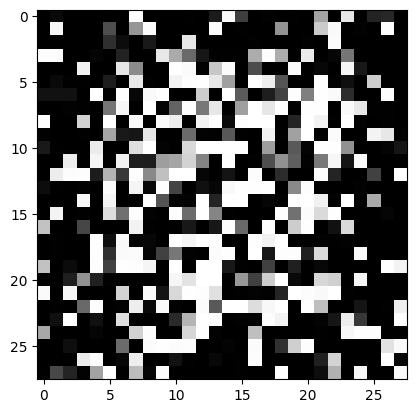

Epoch: 56
Loss train discriminator: 0.00011688203244375472
Loss train generator: 842.4162406921387
torch.Size([1, 784])


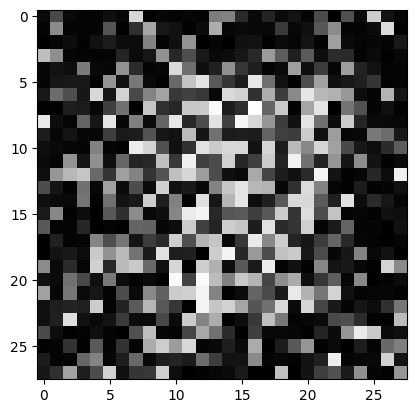

Epoch: 57
Loss train discriminator: 0.00010915055713667243
Loss train generator: 847.5689935684204
torch.Size([1, 784])


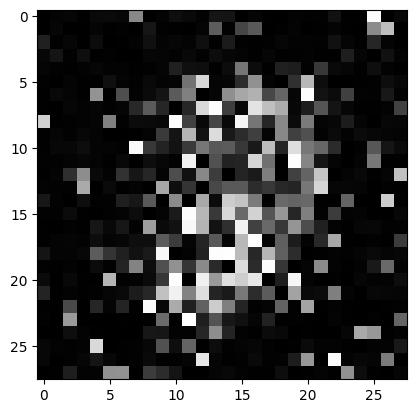

Epoch: 58
Loss train discriminator: 0.00010221935337995092
Loss train generator: 852.4541864395142
torch.Size([1, 784])


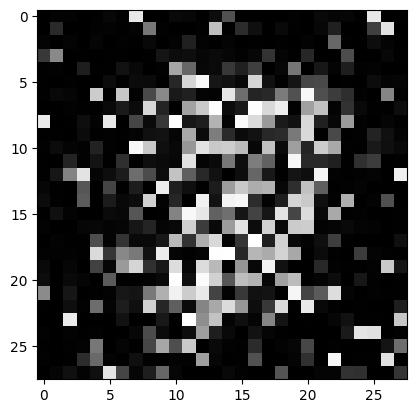

Epoch: 59
Loss train discriminator: 9.708957099974214e-05
Loss train generator: 853.8957395553589
torch.Size([1, 784])


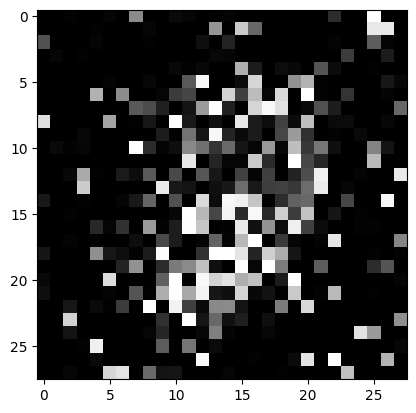

Epoch: 60
Loss train discriminator: 9.250230300494877e-05
Loss train generator: 854.7680864334106
torch.Size([1, 784])


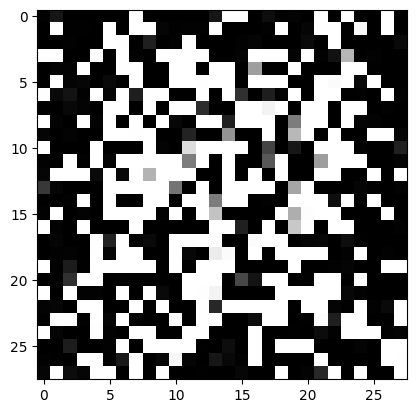

Epoch: 61
Loss train discriminator: 8.702918614744704e-05
Loss train generator: 859.8350191116333
torch.Size([1, 784])


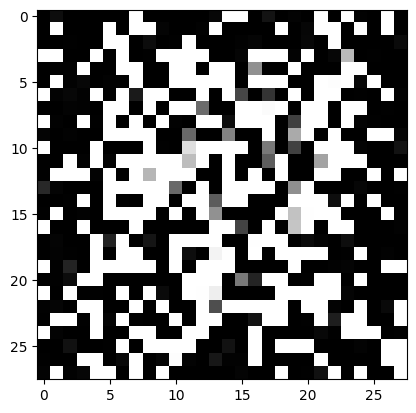

Epoch: 62
Loss train discriminator: 8.20766745164292e-05
Loss train generator: 864.6245679855347
torch.Size([1, 784])


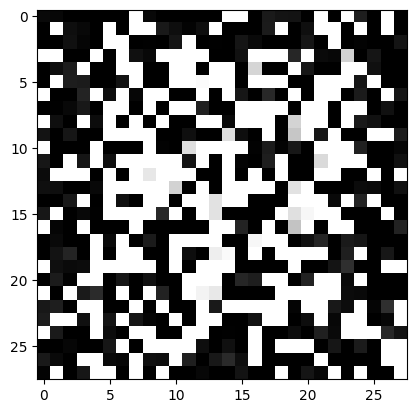

Epoch: 63
Loss train discriminator: 7.754283376470994e-05
Loss train generator: 869.1692790985107
torch.Size([1, 784])


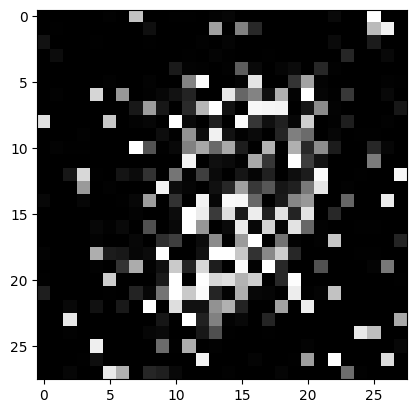

Epoch: 64
Loss train discriminator: 7.33984719545333e-05
Loss train generator: 873.4925632476807
torch.Size([1, 784])


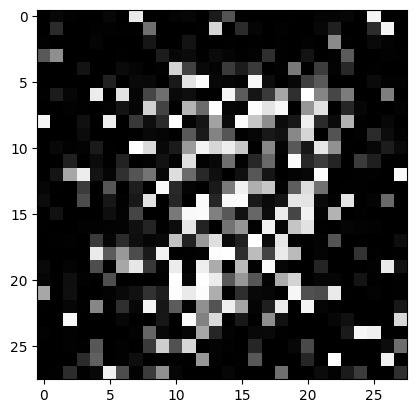

Epoch: 65
Loss train discriminator: 6.960172066783343e-05
Loss train generator: 877.619550704956
torch.Size([1, 784])


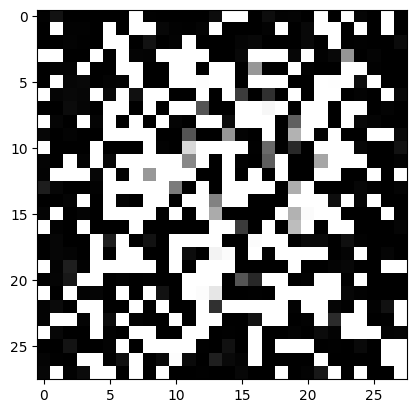

Epoch: 66
Loss train discriminator: 6.606831470890029e-05
Loss train generator: 881.5856761932373
torch.Size([1, 784])


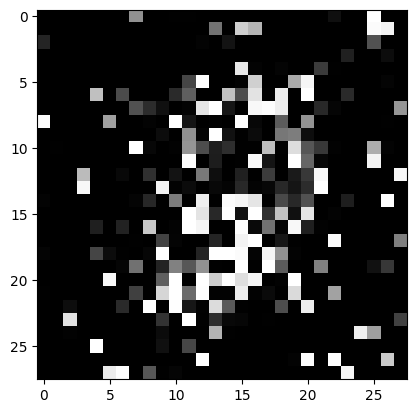

Epoch: 67
Loss train discriminator: 6.28145801329083e-05
Loss train generator: 885.4127969741821
torch.Size([1, 784])


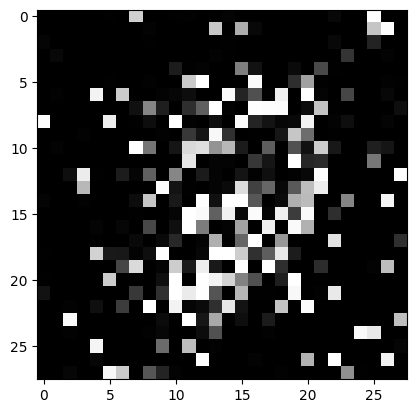

Epoch: 68
Loss train discriminator: 5.980559814133812e-05
Loss train generator: 889.1142053604126
torch.Size([1, 784])


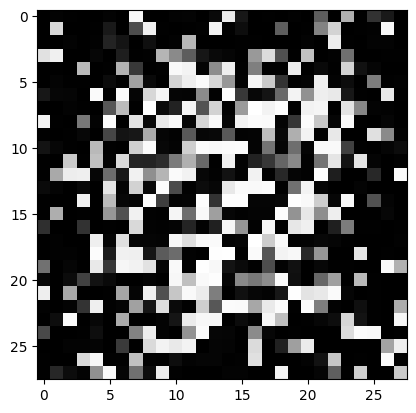

Epoch: 69
Loss train discriminator: 5.696013857914295e-05
Loss train generator: 892.6980695724487
torch.Size([1, 784])


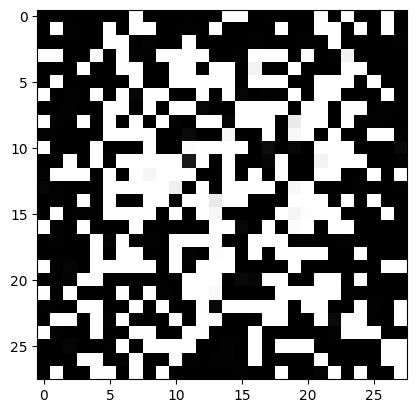

Epoch: 70
Loss train discriminator: 5.4315984641561954e-05
Loss train generator: 896.1633758544922
torch.Size([1, 784])


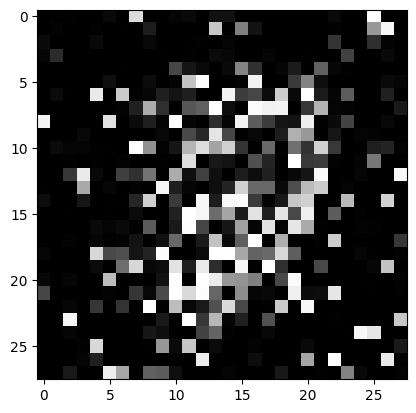

Epoch: 71
Loss train discriminator: 5.1852301567123504e-05
Loss train generator: 899.5351648330688
torch.Size([1, 784])


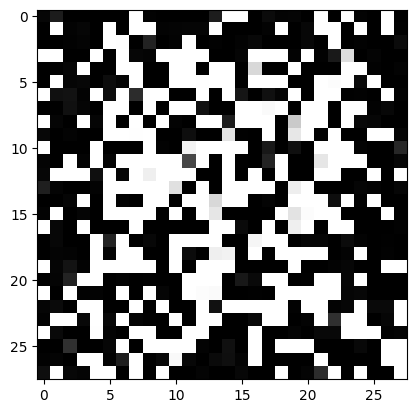

Epoch: 72
Loss train discriminator: 4.9546068623840256e-05
Loss train generator: 902.8111543655396
torch.Size([1, 784])


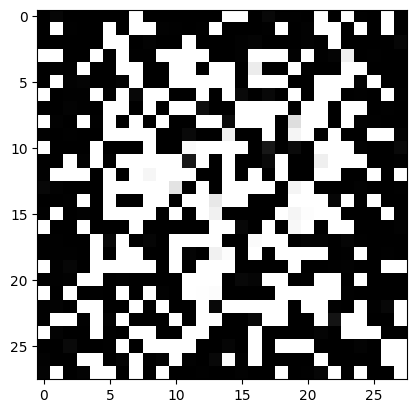

Epoch: 73
Loss train discriminator: 4.7390377119427285e-05
Loss train generator: 905.9086217880249
torch.Size([1, 784])


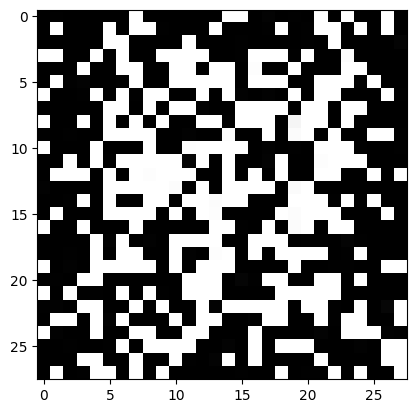

Epoch: 74
Loss train discriminator: 4.53408434850644e-05
Loss train generator: 909.068431854248
torch.Size([1, 784])


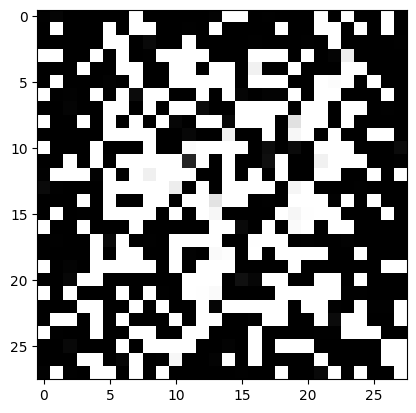

Epoch: 75
Loss train discriminator: 4.340002459457537e-05
Loss train generator: 912.1611270904541
torch.Size([1, 784])


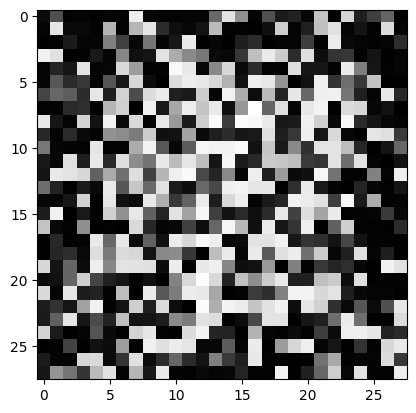

Epoch: 76
Loss train discriminator: 4.157951804018012e-05
Loss train generator: 915.1914281845093
torch.Size([1, 784])


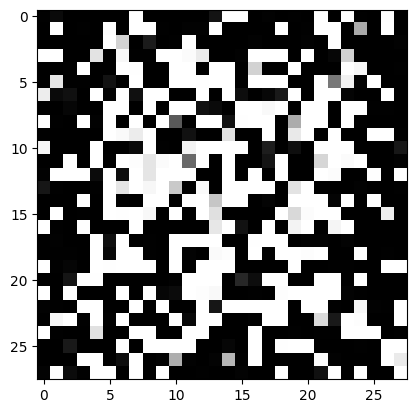

Epoch: 77
Loss train discriminator: 3.985223366953505e-05
Loss train generator: 918.1600074768066
torch.Size([1, 784])


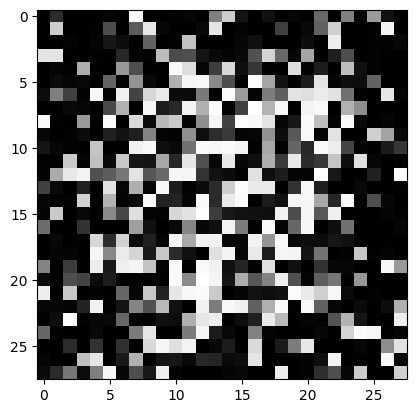

Epoch: 78
Loss train discriminator: 3.8215759786908166e-05
Loss train generator: 921.0704860687256
torch.Size([1, 784])


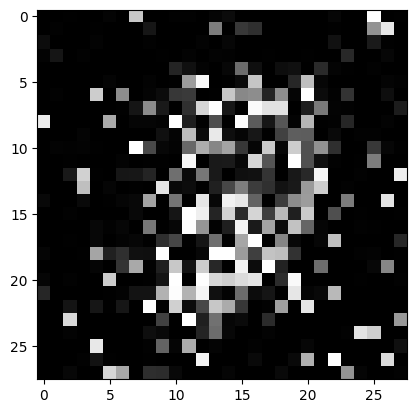

Epoch: 79
Loss train discriminator: 3.6653424075439034e-05
Loss train generator: 923.9143238067627
torch.Size([1, 784])


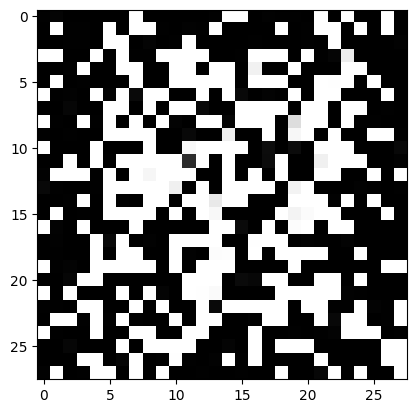

Epoch: 80
Loss train discriminator: 3.5196849637486594e-05
Loss train generator: 926.7070503234863
torch.Size([1, 784])


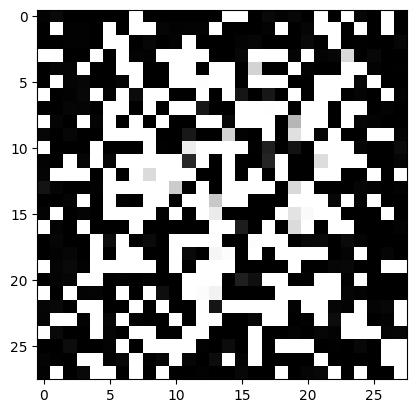

Epoch: 81
Loss train discriminator: 3.3819665304690716e-05
Loss train generator: 929.4411239624023
torch.Size([1, 784])


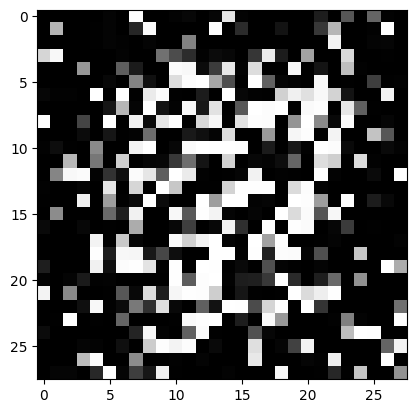

Epoch: 82
Loss train discriminator: 3.248772242159248e-05
Loss train generator: 932.1318197250366
torch.Size([1, 784])


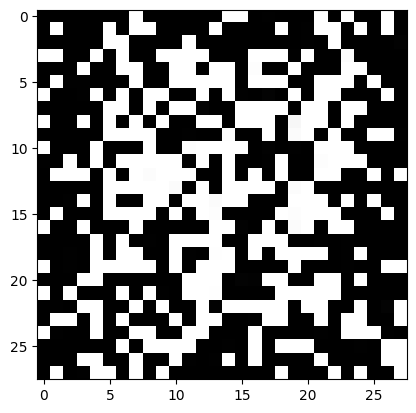

Epoch: 83
Loss train discriminator: 3.12292715420881e-05
Loss train generator: 934.75159740448
torch.Size([1, 784])


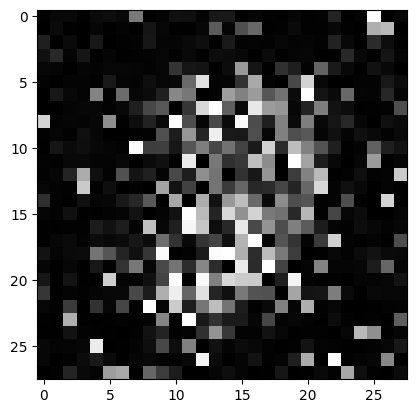

Epoch: 84
Loss train discriminator: 3.0042941318697558e-05
Loss train generator: 937.319730758667
torch.Size([1, 784])


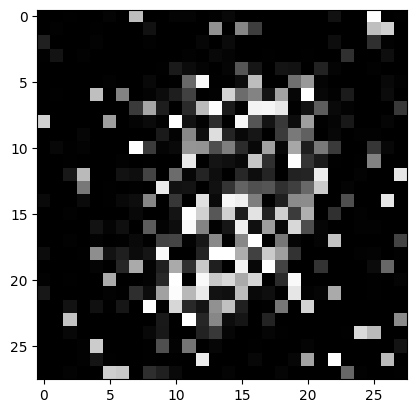

Epoch: 85
Loss train discriminator: 2.890626598173185e-05
Loss train generator: 939.8594064712524
torch.Size([1, 784])


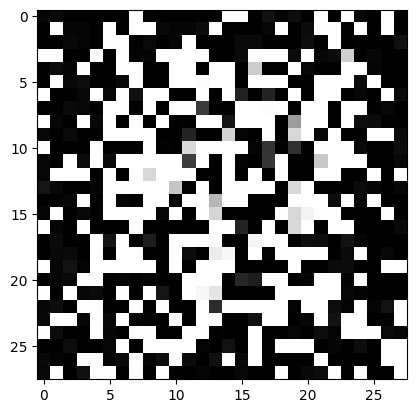

Epoch: 86
Loss train discriminator: 2.7810166329800268e-05
Loss train generator: 942.3732357025146
torch.Size([1, 784])


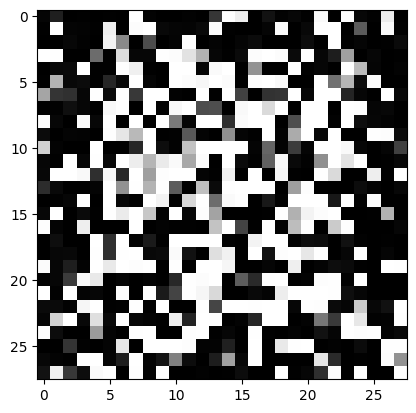

Epoch: 87
Loss train discriminator: 2.6770569178324877e-05
Loss train generator: 944.8619337081909
torch.Size([1, 784])


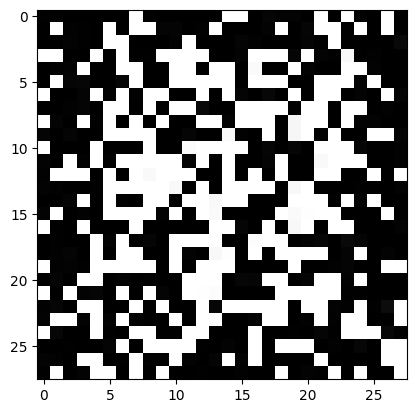

Epoch: 88
Loss train discriminator: 2.5775068962730074e-05
Loss train generator: 947.3262939453125
torch.Size([1, 784])


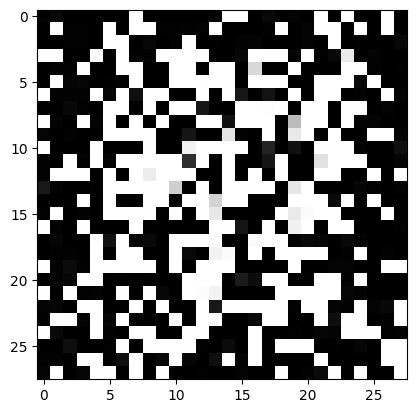

Epoch: 89
Loss train discriminator: 2.4825842075415494e-05
Loss train generator: 949.7671766281128
torch.Size([1, 784])


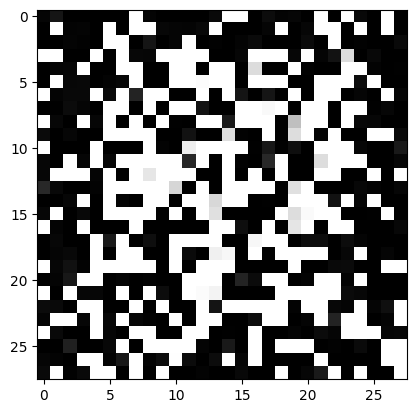

Epoch: 90
Loss train discriminator: 2.3914499564625658e-05
Loss train generator: 952.1723184585571
torch.Size([1, 784])


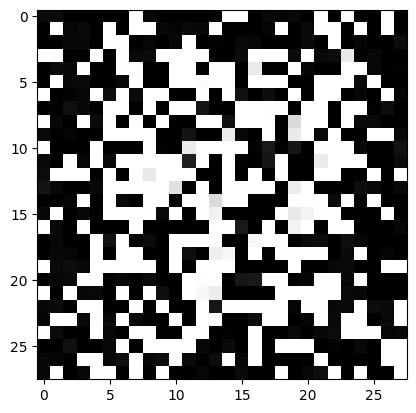

Epoch: 91
Loss train discriminator: 2.30366446487551e-05
Loss train generator: 954.5522880554199
torch.Size([1, 784])


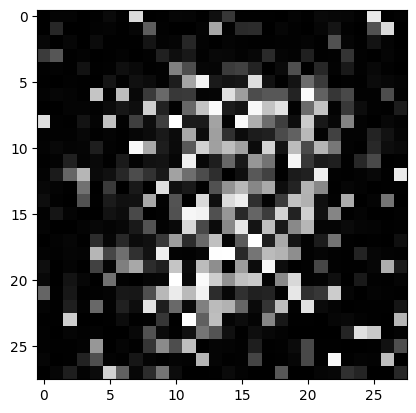

Epoch: 92
Loss train discriminator: 2.2200737390676295e-05
Loss train generator: 956.9139804840088
torch.Size([1, 784])


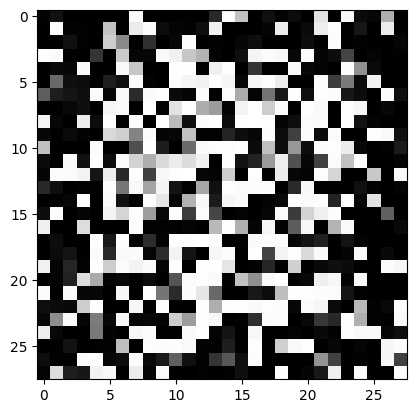

Epoch: 93
Loss train discriminator: 2.140972679853803e-05
Loss train generator: 959.2580661773682
torch.Size([1, 784])


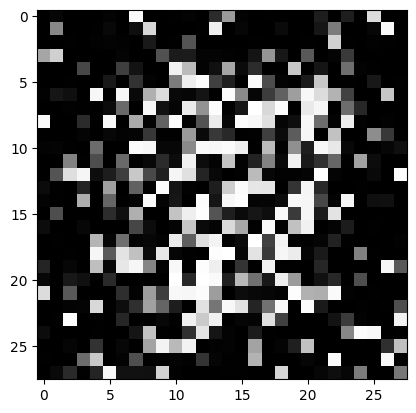

Epoch: 94
Loss train discriminator: 2.0650240060149372e-05
Loss train generator: 961.585485458374
torch.Size([1, 784])


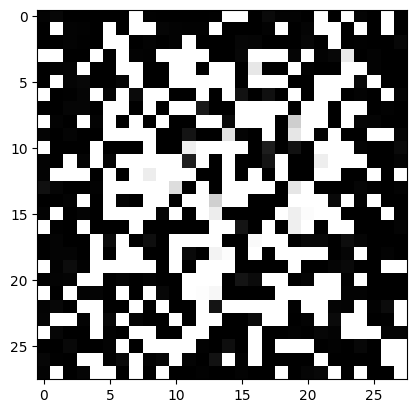

Epoch: 95
Loss train discriminator: 1.9923866517501665e-05
Loss train generator: 963.8964920043945
torch.Size([1, 784])


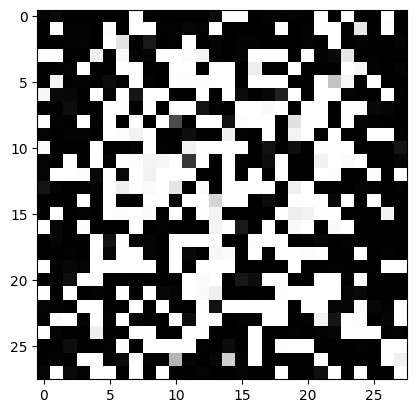

Epoch: 96
Loss train discriminator: 1.922782729479877e-05
Loss train generator: 966.1908378601074
torch.Size([1, 784])


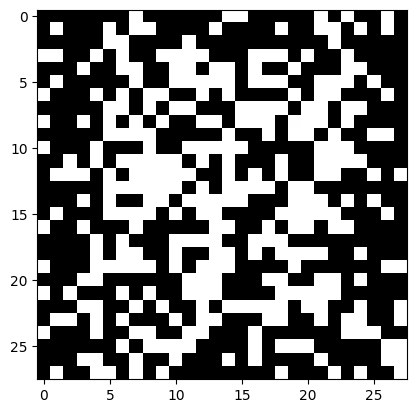

Epoch: 97
Loss train discriminator: 1.8560021700864127e-05
Loss train generator: 968.4571590423584
torch.Size([1, 784])


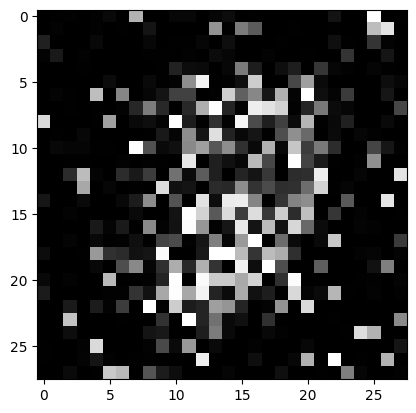

Epoch: 98
Loss train discriminator: 1.7929585808929005e-05
Loss train generator: 970.7048568725586
torch.Size([1, 784])


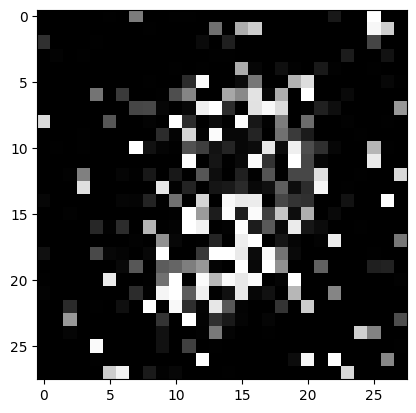

Epoch: 99
Loss train discriminator: 1.7322804211516996e-05
Loss train generator: 972.9389762878418


In [7]:
import tqdm.auto as tqdm

def train(epoch):
    print("Epoch:", epoch)

    loss_discriminator_total = 0;
    loss_generator_total = 0;

    for b_idx, batch in enumerate(loader):
        batch = batch["pixel_values"]

        loss_discriminator = 0;

        # Generator

        optimizerGenerator.zero_grad()

        gen_images = gen(torch.rand(batch_size, latent_dim, device=device));
        dis_pred = dis(gen_images)
        gen_loss = loss_fn(dis_pred, torch.ones_like(dis_pred))

        loss_generator_total += gen_loss.item()

        gen_loss.backward()
        optimizerGenerator.step()


        # Discriminator

        optimizerDiscriminator.zero_grad()

        real_image = batch.reshape(-1, resolution * resolution).to(device)
        fake_image = gen(torch.rand((batch_size, latent_dim)).to(device))

        pred_real = dis(real_image)
        pred_fake = dis(fake_image.detach())

        dis_loss_real = loss_fn(pred_real, torch.ones_like(pred_real))
        dis_loss_fake = loss_fn(pred_fake, torch.zeros_like(pred_fake))

        dis_loss = (dis_loss_real + dis_loss_fake) / 2

        loss_discriminator_total += dis_loss.item()
        
        dis_loss.backward()
        optimizerDiscriminator.step()


    print("Loss train discriminator:", loss_discriminator_total)
    print("Loss train generator:", loss_generator_total)


def displayOneGen():
    noise = torch.randn((1, latent_dim)).to(device)
    pred = gen(noise)

    print(pred.shape)

    plt.imshow(pred[0].reshape(28, 28).cpu().detach().numpy(), cmap="gray")
    plt.show()

for i in range(100):
    displayOneGen()
    train(i)

